# Evaluate Restaurant Review

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Ignoring double " with quoting equal 3
dataset = pd.read_csv('Data/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
# Cleaning the first review
import re

print(dataset['Review'][0])

# Keep only letters
# 1st param: what do you to remove?
# 2nd param: replaced character
# 3rd param: the text to be modified
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][0])
print(review)

# Putting all letters in lower case
review = review.lower()
print(review)

# this ... is irrelevant
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

review = review.split()
print(review)

#review = [word for word in review if not word in stopwords.words('english')]
review = [word for word in review if not word in set(stopwords.words('english'))]
print(review)

# love, loved ... indicate a good review ... stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review]
print(review)

# Join back
review = ' '.join(review)
print(review)

Wow... Loved this place.
Wow    Loved this place 
wow    loved this place 
['wow', 'loved', 'this', 'place']
['wow', 'loved', 'place']
['wow', 'love', 'place']
wow love place


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/teixeira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Cleaning the texts
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

corpus[:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [6]:
dataset['Review'][:10]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

In [7]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [8]:
X.shape

(1000, 1565)

In [9]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

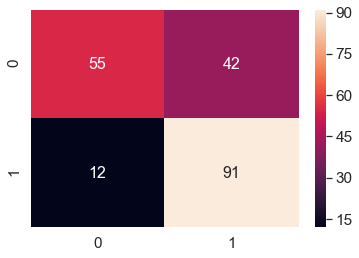

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set or Random Forest are more common
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

# Spam Detector

In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
import re

print(df['v2'][0])

# Keep only letters
# 1st param: what do you to remove?
# 2nd param: replaced character
# 3rd param: the text to be modified
email = re.sub('[^a-zA-Z]', ' ', df['v2'][0])
print(email)

# Putting all letters in lower case
email = email.lower()
print(email)

email = email.split()
print(email)

email = [word for word in email if not word in set(stopwords.words('english'))]
print(email)


from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in email]
print(email)


email = ' '.join(email)
print(email)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   
go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [7]:
array = []
for i in range(len(df)):
    email = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    email = email.lower()
    email = email.split()
    ps = PorterStemmer()
    email = [ps.stem(word) for word in email if not word in set(stopwords.words('english'))]
    email = ' '.join(email)
    array.append(email)

array[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(array).toarray()
y = df.iloc[:, 1].values

In [9]:
X.shape

(5572, 6221)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm)
#range(2),range(2)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})